In [1]:
from word2vec.Word2Vec import studentFeedbackWord2Vec

w2v_skipgram = studentFeedbackWord2Vec()
w2v_skipgram.load("word2vec/skipgram_model.bin")

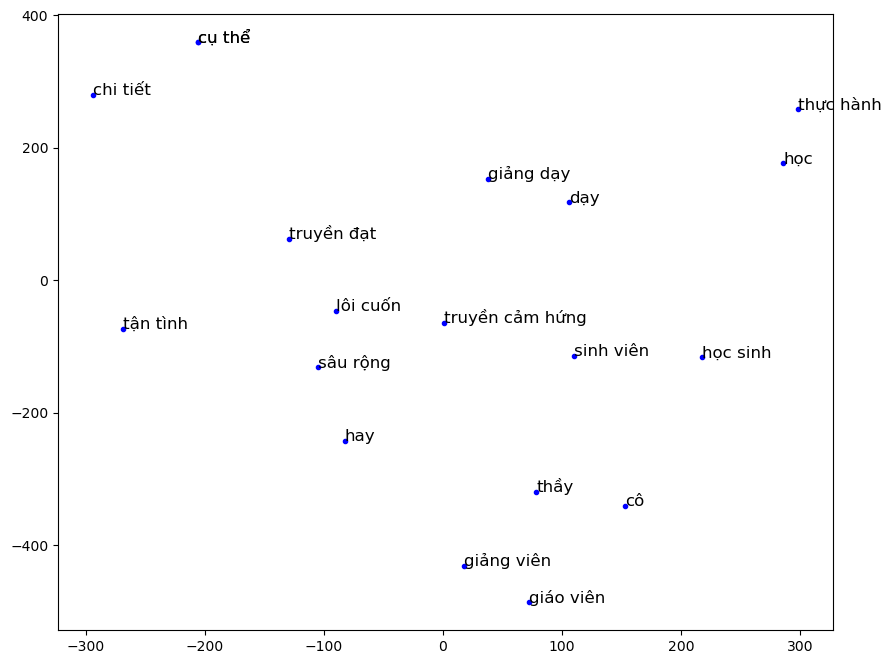

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Chọn các từ bạn muốn vẽ
selected_words = ["thầy","giảng viên", "giáo viên", "cô",
                  "học", "thực hành", 
                  "giảng dạy", "dạy", "truyền đạt", 
                  "sinh viên", "học sinh", 
                  "lôi cuốn", "truyền cảm hứng", "hay", "sâu rộng", 
                  "chi tiết", "tận tình", "cụ thể", "cụ thể"]

# Lấy vector của các từ từ mô hình
vectors = np.array([w2v_skipgram.get_vector(word) for word in selected_words])

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Hiển thị tên của các từ
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.show()

In [3]:
w2v_skipgram.most_similar("colonsmile")

[('colonlove', 0.8765620589256287),
 ('khỏe', 0.8617053031921387),
 ('colonhihi', 0.8442266583442688),
 ('à', 0.8234719038009644),
 ('chúc', 0.8205661177635193),
 ('tuyệt', 0.8121256232261658),
 ('thương', 0.8079304695129395),
 ('hi hi', 0.7861111164093018),
 ('ơn', 0.781124472618103),
 ('đẹp trai', 0.7759368419647217)]

In [1]:
from keras.models import load_model

# Assuming you have trained and saved your model as follows
# model.save("models/lstm_model.h5")

# Now, to load the model for later use
loaded_model = load_model("models/lstm_model.h5")

In [14]:
import pickle
from underthesea import word_tokenize
from utils.preprocessing import remove_punctuation
import numpy as np

with open("utils/words_dict.pkl", "rb") as file:
    words = pickle.load(file)

desired_sequence_length = 205


def tokenize_vietnamese_sentence(sentence):
    return word_tokenize(remove_punctuation(sentence.lower()))

def sent2vec(message, word_dict = words):
    tokens = tokenize_vietnamese_sentence(message)
    vectors = []
    
    for token in tokens:
        if token not in word_dict.keys():
            continue
        token_vector = word_dict[token]
        vectors.append(token_vector)
    return np.array(vectors, dtype=float)

def pad_sequence_sentence(sentence):
    array = sent2vec(sentence)
    arr_seq_len = array.shape[0]
    sequence_length_difference = desired_sequence_length - arr_seq_len
        
    pad = np.zeros(shape=(sequence_length_difference, 200))

    array = np.array(np.concatenate([array, pad]))
    array = np.expand_dims(array, axis=0)
    return array